# IMPORT LIBS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# READ DATA

In [2]:
olist_customer = pd.read_csv('olist_customers_dataset.csv')
olist_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
olist_orders = pd.read_csv('olist_orders_dataset.csv')
olist_order_items = pd.read_csv('olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
olist_products = pd.read_csv('olist_products_dataset.csv')
olist_sellers = pd.read_csv('olist_sellers_dataset.csv')
olist_categories = pd.read_csv('product_category_name_translation.csv')

# DATA CLEANING

In [3]:
print(f'First observation was in: \
{olist_orders["order_purchase_timestamp"].min()}')
print(f'Last observation was in: \
{olist_orders["order_purchase_timestamp"].max()}')

First observation was in: 2016-09-04 21:15:19
Last observation was in: 2018-10-17 17:30:18


In [4]:
#dropna at olist_orders
olist_orders.drop_duplicates(subset='order_id', inplace=True)

In [5]:
#
olist_order_items['shipping_limit_date'] = olist_order_items['shipping_limit_date'].astype('datetime64[ns]')
olist_order_items['shipping_limit_date'].head()

0   2017-09-19 09:45:35
1   2017-05-03 11:05:13
2   2018-01-18 14:48:30
3   2018-08-15 10:10:18
4   2017-02-13 13:57:51
Name: shipping_limit_date, dtype: datetime64[ns]

In [6]:
#dropna at olist_order_reviews
olist_order_reviews.drop_duplicates(subset='review_id', inplace=True)

In [7]:
#transfom data to date_time
datetime_columns = ['review_creation_date','review_answer_timestamp']

for column in datetime_columns:
  olist_order_reviews[column] = pd.to_datetime(olist_order_reviews[column])     

In [8]:
datetime_columns = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns:
  olist_orders[column] = pd.to_datetime(olist_orders[column])

In [9]:
#transfer data to date_time
olist_orders['year'] = olist_orders['order_purchase_timestamp'].dt.year
olist_orders['month'] = olist_orders['order_purchase_timestamp'].dt.month
olist_orders['date'] = olist_orders['order_purchase_timestamp'].dt.day.astype("Int64")

In [10]:
olist_products.rename(columns={'product_name_lenght': 'product_name_length', 'product_description_lenght': 'product_description_length'}, inplace=True)

In [11]:
olist_products['product_name_length'].fillna(olist_products['product_name_length'].mean(), inplace=True)
olist_products['product_description_length'].fillna(olist_products['product_description_length'].mean(), inplace=True)
olist_products['product_photos_qty'].fillna(olist_products['product_photos_qty'].mean(), inplace=True)
olist_products['product_weight_g'].fillna(olist_products['product_weight_g'].mean(), inplace=True)
olist_products['product_length_cm'].fillna(olist_products['product_length_cm'].mean(), inplace=True)
olist_products['product_height_cm'].fillna(olist_products['product_height_cm'].mean(), inplace=True)
olist_products['product_width_cm'].fillna(olist_products['product_width_cm'].mean(), inplace=True)

# MERGE DATA

In [12]:
# products & product_category
df_product_categories = pd.merge(
    left=olist_products,
    right=olist_categories,
   how='outer',
  left_on='product_category_name',
 right_on='product_category_name'
)

In [13]:
#order_items & order_payment
df_orders = pd.merge(
    left=olist_order_items,
    right=olist_order_payments,
    how='outer',
    left_on='order_id',
    right_on='order_id'
)


In [14]:
#orders & product_categories
df_order_product = pd.merge(
    left=df_orders,
    right=df_product_categories,
    how='outer',
    left_on='product_id',
    right_on='product_id'
)

In [15]:
#orders & customers
df_orders_customers = pd.merge(
    left=olist_orders,
    right=olist_customer,
    how='outer',
    left_on='customer_id',
    right_on='customer_id'
)


In [16]:
df = pd.merge(
    left=df_order_product,
    right=df_orders_customers,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

In [17]:
df = pd.merge(
    left=df_order_product,
   right=df_orders_customers,
    how='left',
    left_on='order_id',
    right_on='order_id'
)


# EDA

## 1: What is the total revenue generated by Olist, and how has it changed over time?

In [18]:
filtered_data = olist_orders[(olist_orders['year'] >= 2016) & (olist_orders['year'] <= 2018)]

In [19]:
merged_data = pd.merge(olist_order_items, filtered_data, on='order_id')
merged_data['total_revenue'] = merged_data['price'] + merged_data['freight_value']

In [20]:
revenue_over_time = merged_data.groupby(['month'])['total_revenue'].sum().reset_index()


Text(0.5, 1.0, 'Total Revenue Generated by Month')

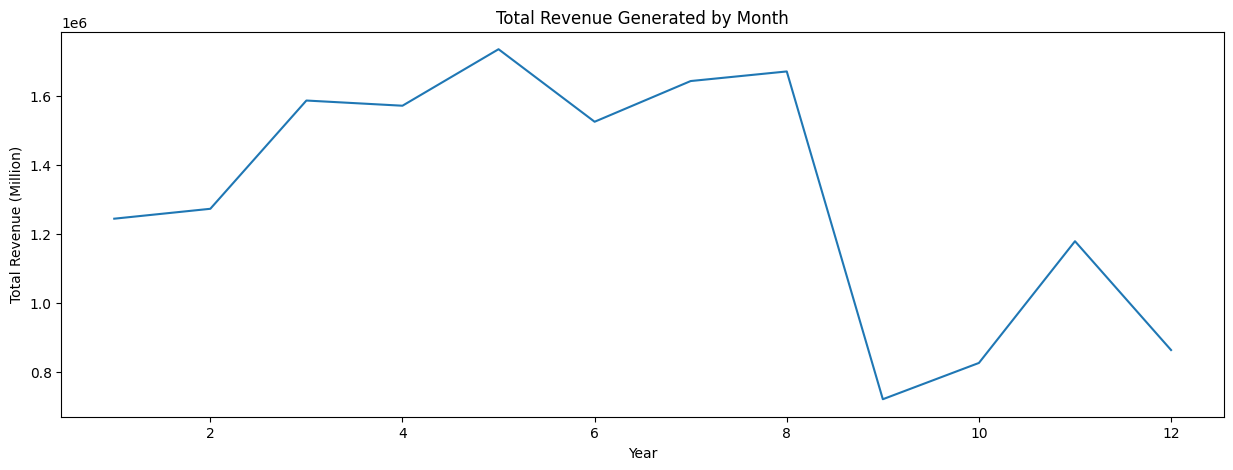

In [21]:
plt.figure(figsize=(15,5))
sns.lineplot(data=revenue_over_time, x='month',y='total_revenue')

plt.xlabel('Year')
plt.ylabel('Total Revenue (Million)')
plt.title('Total Revenue Generated by Month')

In [22]:
revenue_over_year = merged_data.groupby(['year'])['total_revenue'].sum().reset_index()
revenue_over_year

,year,total_revenue
0,2016,57183.21
1,2017,7142672.43
2,2018,8643697.60


Text(0.5, 1.0, 'Total Revenue by Year')

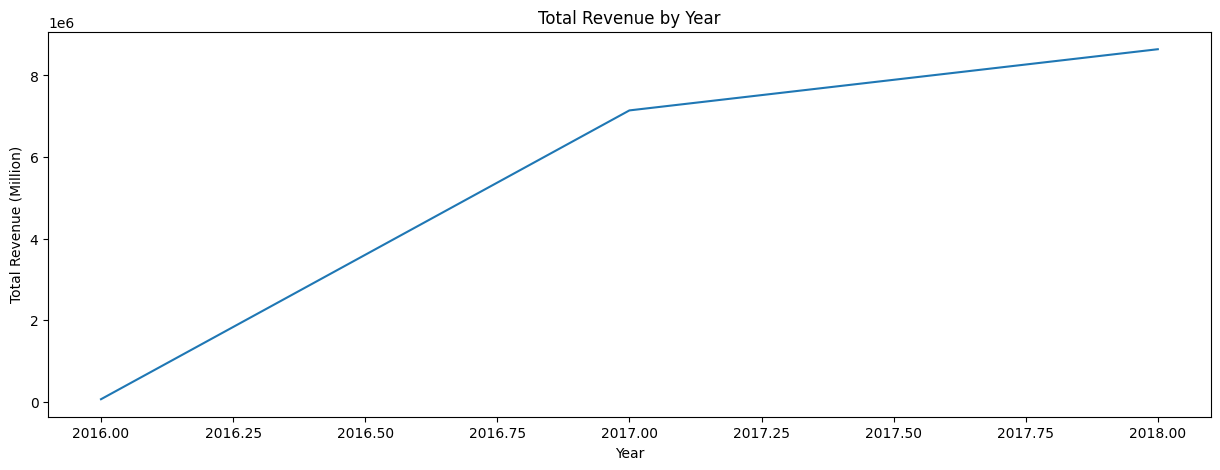

In [23]:
plt.figure(figsize=(15,5))
sns.lineplot(data=revenue_over_year, x='year',y='total_revenue')

plt.xlabel('Year')
plt.ylabel('Total Revenue (Million)')
plt.title('Total Revenue by Year')

## 2:Total Orders on E-Commerce

C:\Users\trime\AppData\Local\Temp\ipykernel_27476\2018304395.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette='viridis')
C:\Users\trime\AppData\Local\Temp\ipykernel_27476\2018304395.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, order_status_counts[i] + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')


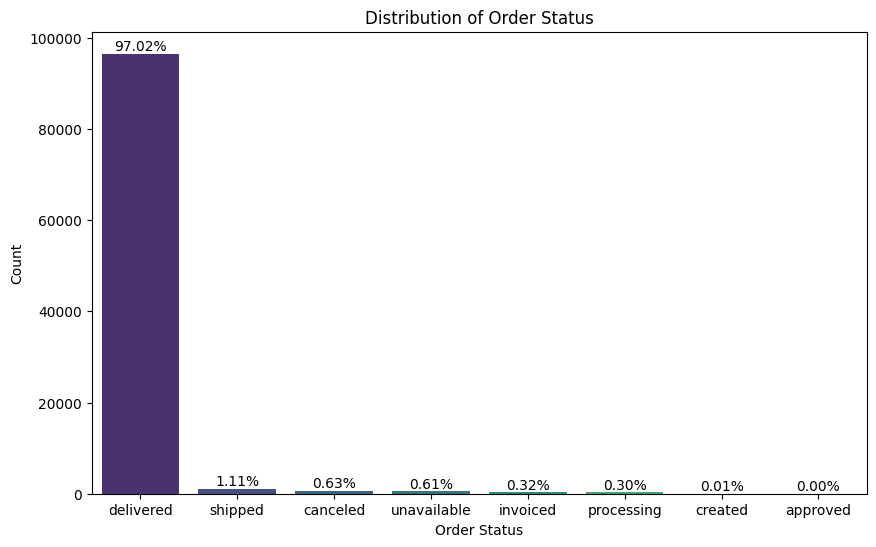

In [24]:
order_status_counts = olist_orders['order_status'].value_counts()

# Calculate percentages
order_status_percentages = order_status_counts / order_status_counts.sum() * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette='viridis')

# Add percentages above the bars
for i, percentage in enumerate(order_status_percentages):
    plt.text(i, order_status_counts[i] + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')

# Set plot labels and title
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.title('Distribution of Order Status')

# Show the plot
plt.show()


## 3: Is there any growing trend on brazilian e-commerce

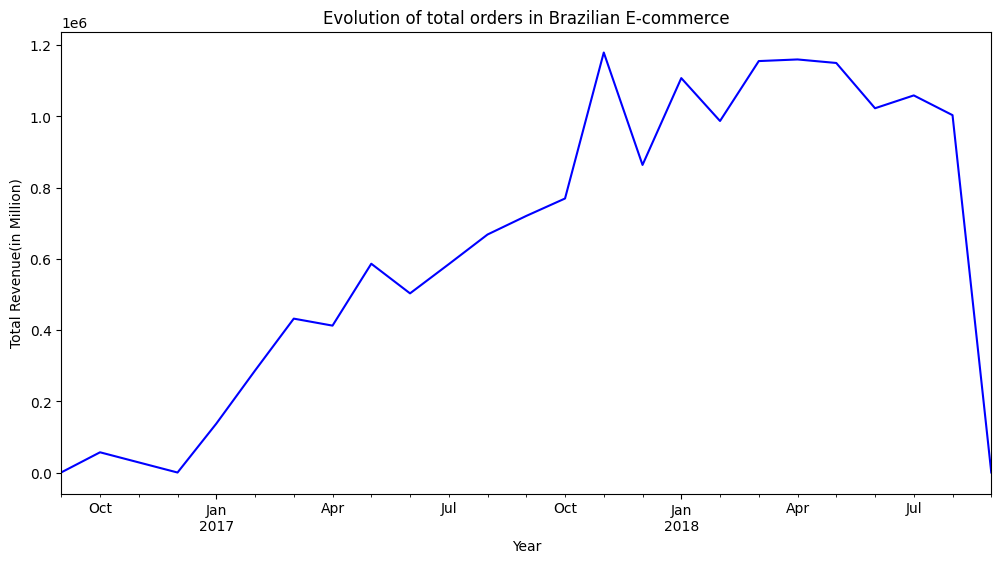

In [25]:
# Group by date and calculate total revenue
revenue_over_trend = merged_data.groupby(merged_data['order_purchase_timestamp'].dt.to_period("M"))['total_revenue'].sum()

# Plot the total revenue over time
plt.figure(figsize=(12, 6))
revenue_over_trend.plot(kind='line', color='b')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Total Revenue(in Million)')
plt.title('Evolution of total orders in Brazilian E-commerce')

# Show the plot
plt.show()


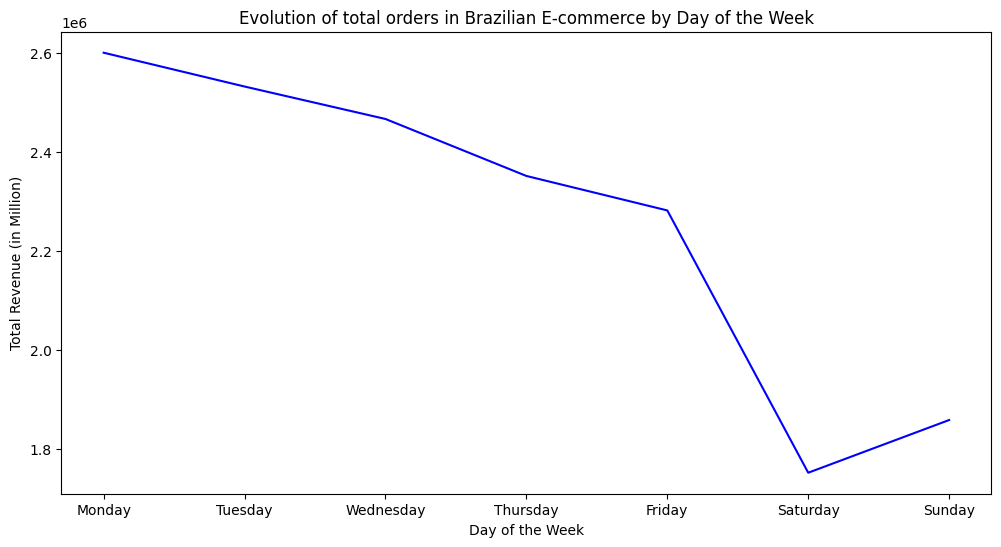

In [26]:
# Group by day of the week and calculate total revenue
revenue_over_trend = merged_data.groupby(merged_data['order_purchase_timestamp'].dt.day_name())['total_revenue'].sum()

# Order the days of the week
order_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the total revenue over the days of the week
plt.figure(figsize=(12, 6))
revenue_over_trend[order_day].plot(kind='line', color='b')



# Set plot labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue (in Million)')
plt.title('Evolution of total orders in Brazilian E-commerce by Day of the Week')

# Show the plot
plt.show()


## 4: What are the most popular product categories on Olist, and how do their sales volumes

In [27]:
top_categories = df.groupby(by=['product_category_name_english']).agg({
    'payment_value':'sum',
    'product_category_name_english': 'count'

})
top_categories.rename(columns={
    'payment_value':'revenue',
    'product_category_name_english': 'category_count'

}, inplace=True)


top_categories = top_categories.sort_values(by='revenue', ascending=False).reset_index().head(20)
top_categories

,product_category_name_english,revenue,category_count
0,bed_bath_table,1712553.67,11823
1,health_beauty,1657373.12,9975
2,computers_accessories,1585330.45,8082
3,furniture_decor,1430176.39,8744
4,watches_gifts,1429216.68,6201
5,sports_leisure,1392127.56,8945
6,housewares,1094758.13,7355
7,auto,852294.33,4379
8,garden_tools,838280.75,4574
9,cool_stuff,779698.00,3987


C:\Users\trime\AppData\Local\Temp\ipykernel_27476\2331272705.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='revenue', data=top_categories,palette='dark:red')
C:\Users\trime\AppData\Local\Temp\ipykernel_27476\2331272705.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_categories['product_category_name_english'], rotation=45, ha='right')


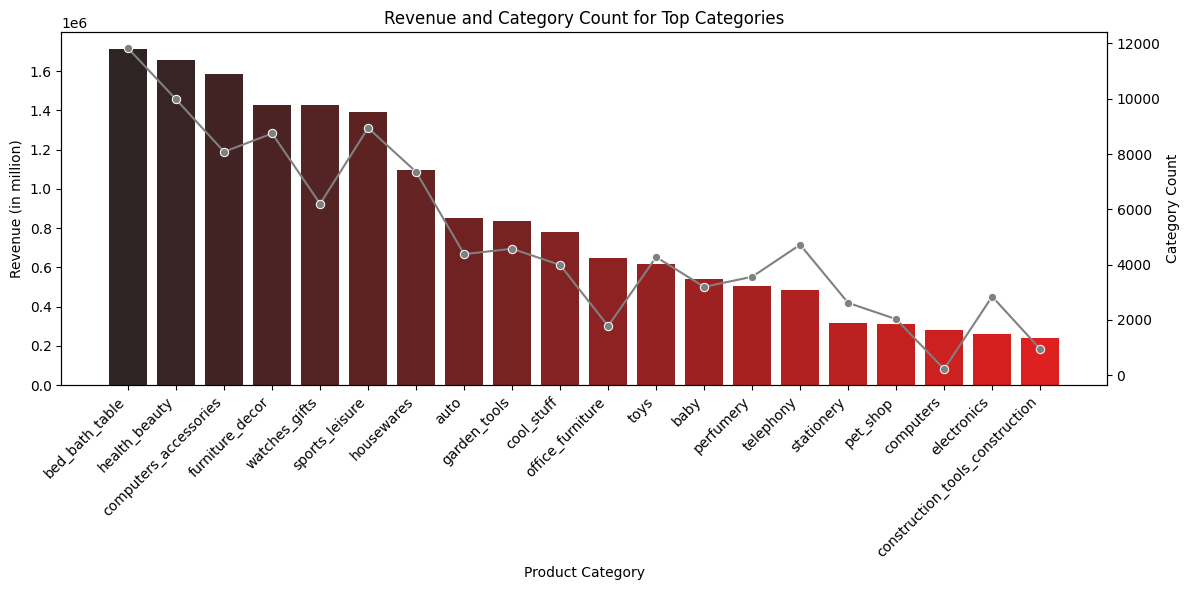

In [28]:
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(x='product_category_name_english', y='revenue', data=top_categories,palette='dark:red')
ax2 = ax1.twinx()

sns.lineplot(x='product_category_name_english', y='category_count', data=top_categories, marker='o',color='grey')


ax1.set_xlabel('Product Category')
ax1.set_ylabel('Revenue (in million)')
ax2.set_ylabel('Category Count')
plt.title('Revenue and Category Count for Top Categories')

# Customize the x-axis labels for better visibility
ax1.set_xticklabels(top_categories['product_category_name_english'], rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


## 4: Review score

C:\Users\trime\AppData\Local\Temp\ipykernel_27476\3515260713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_score', data=olist_order_reviews, palette='dark:blue')


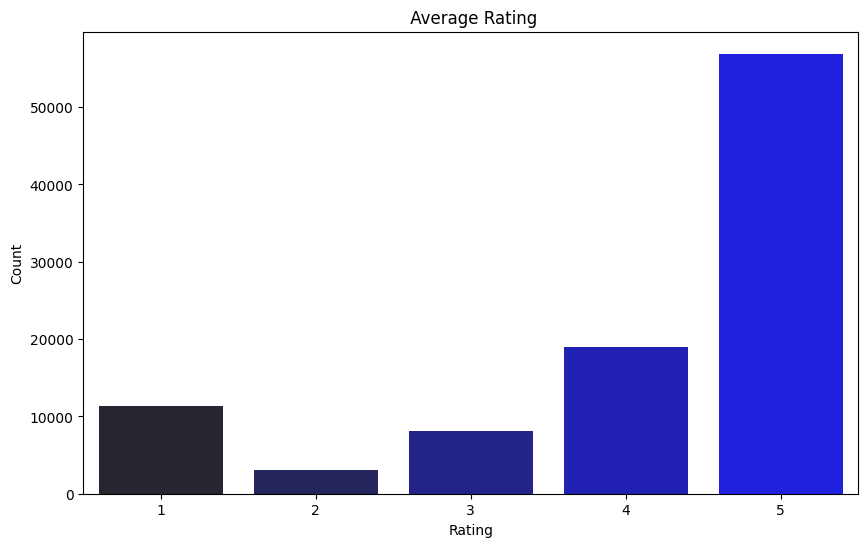

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='review_score', data=olist_order_reviews, palette='dark:blue')

# Set plot labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title(' Average Rating')

# Show the plot
plt.show()


## 5: Payment Type Analysis

In [30]:
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   year                           99441 non-null  int32         
 9   month                          99441 non-null  int32         
 10  date                           99441 non-null  Int64         
dtypes: Int64(1), da

In [31]:
df_payment_type = pd.merge(olist_orders, olist_order_payments, on='order_id')


C:\Users\trime\AppData\Local\Temp\ipykernel_27476\1349260656.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette='tab20b')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\trime\AppData\Local\Temp\ipykernel_27476\1349260656.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_installments_counts.index, y=payment_installments_counts.values, palette='viridis')


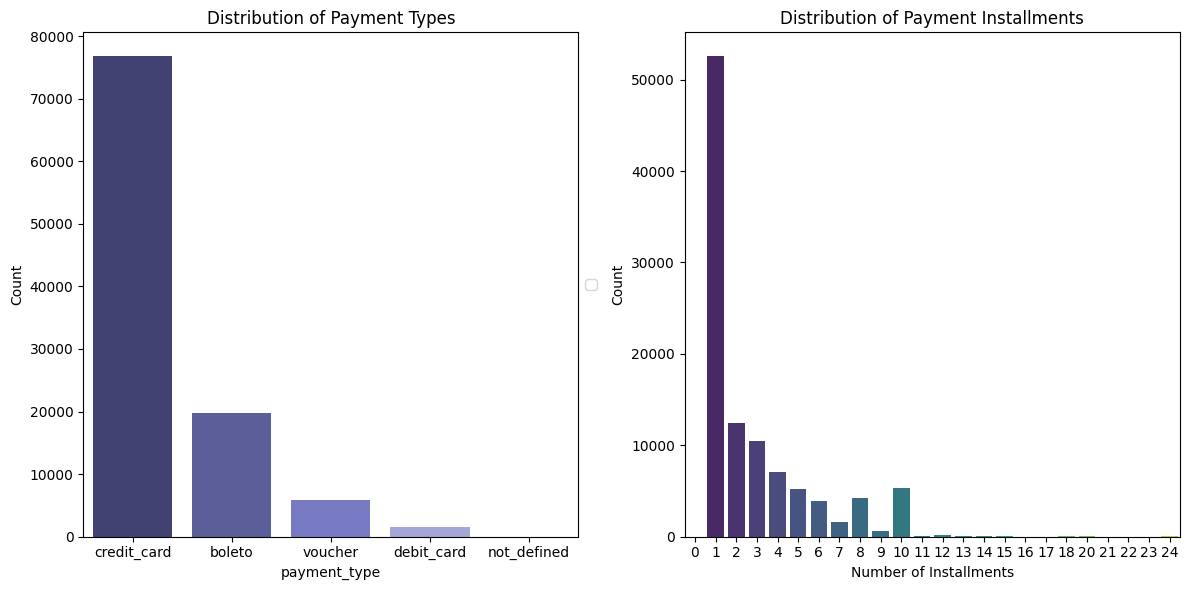

In [32]:
payment_type_counts = olist_order_payments['payment_type'].value_counts()

# Count the occurrences of each number of payment installments
payment_installments_counts = olist_order_payments['payment_installments'].value_counts()

# Plot a pie chart for payment types
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette='tab20b')
plt.title('Distribution of Payment Types')
plt.ylabel('Count')

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
# Plot a bar plot for payment installments
plt.subplot(1, 2, 2)
sns.barplot(x=payment_installments_counts.index, y=payment_installments_counts.values, palette='viridis')
plt.title('Distribution of Payment Installments')
plt.xlabel('Number of Installments')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [33]:
merged_data['order_purchase_year_month'] = merged_data['order_purchase_timestamp'].dt.to_period("M")


In [34]:
summary_by_year = merged_data.groupby('order_purchase_year_month').agg({
    'order_id': 'nunique',
    'total_revenue': 'sum'
}).reset_index()
summary_by_year.set_index('order_purchase_year_month', inplace=True)

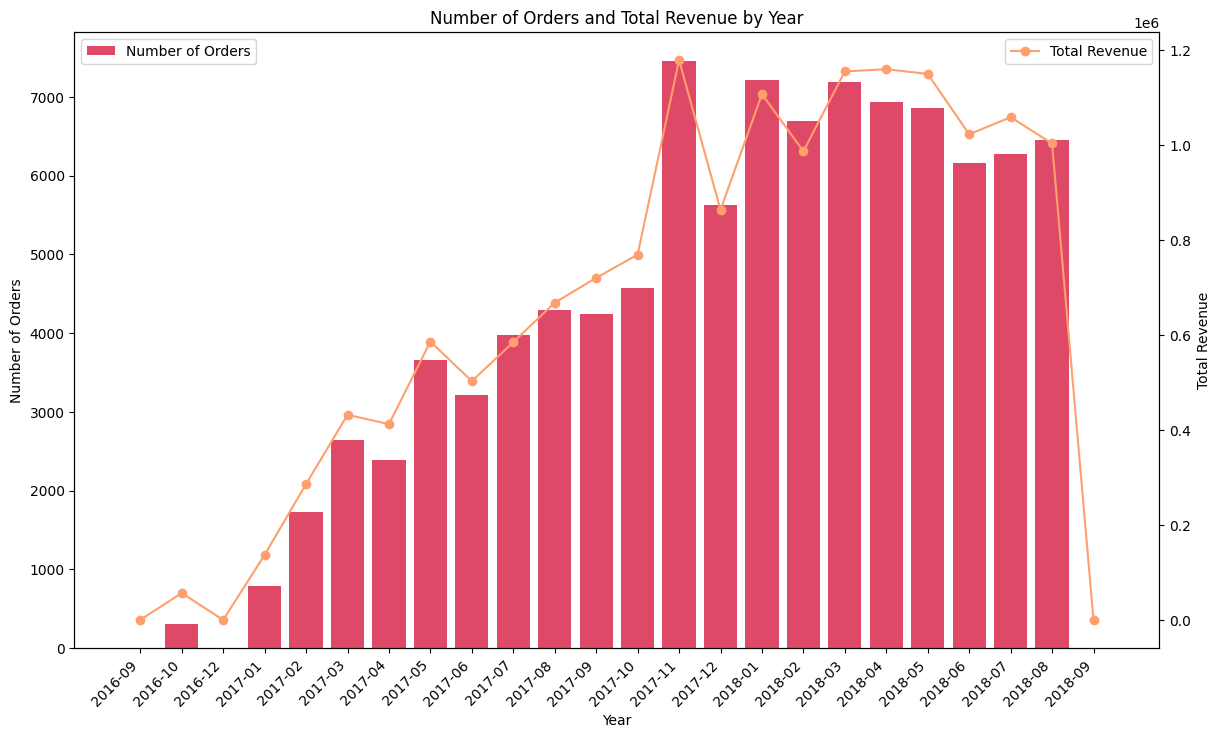

In [35]:
#add color
magma_cmap = sns.color_palette("magma", as_cmap=True)
# Plot the combined bar plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for the number of orders
ax1.bar(summary_by_year.index.astype(str), summary_by_year['order_id'], color=plt.cm.magma(0.6), label='Number of Orders')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Orders')
ax1.tick_params('y')

ax1.legend(loc='upper left')
plt.xticks(rotation=45, ha='right')

# Create a second y-axis for total revenue
ax2 = ax1.twinx()
ax2.plot(summary_by_year.index.astype(str), summary_by_year['total_revenue'], color=plt.cm.magma(0.8), marker='o', label='Total Revenue')
ax2.set_ylabel('Total Revenue')
ax2.tick_params('y')
ax2.legend(loc='upper right')

# Set plot title
plt.title('Number of Orders and Total Revenue by Year')

# Show the plot
plt.show()


## STATE

C:\Users\trime\AppData\Local\Temp\ipykernel_27476\3866329902.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=totalByState.index, y=totalByState,palette='dark:red')


Text(0.5, 0, 'State')

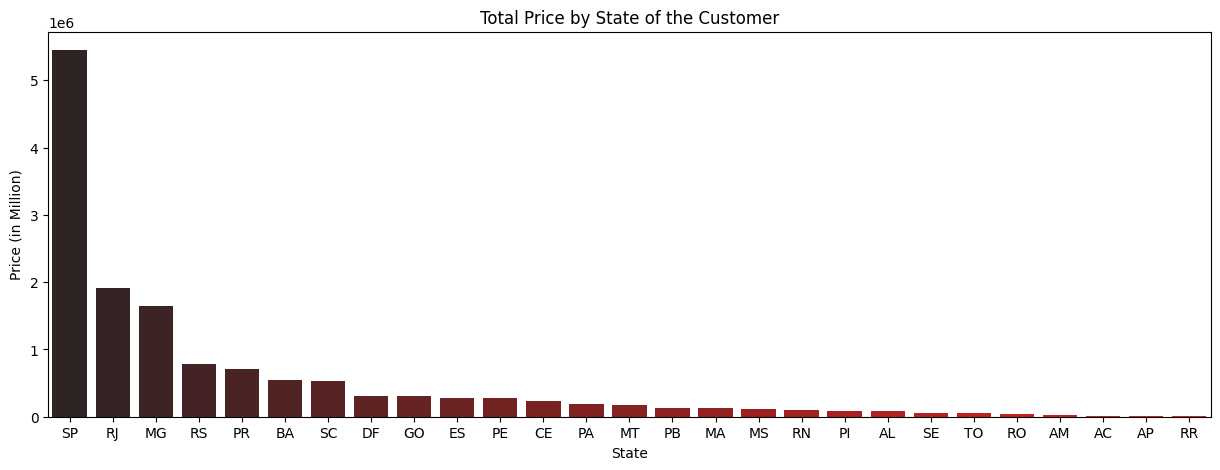

In [36]:
totalByState = df.groupby('customer_state')['price'].sum().sort_values(ascending=False)

plt.figure(figsize=(15,5))
plt.title('Total Price by State of the Customer')
sns.barplot(x=totalByState.index, y=totalByState,palette='dark:red')
plt.ylabel('Price (in Million)')
plt.xlabel('State')

C:\Users\trime\AppData\Local\Temp\ipykernel_27476\2802440183.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=totalOrdersByState.index, y=totalOrdersByState,palette='dark:gray')


Text(0.5, 0, 'State')

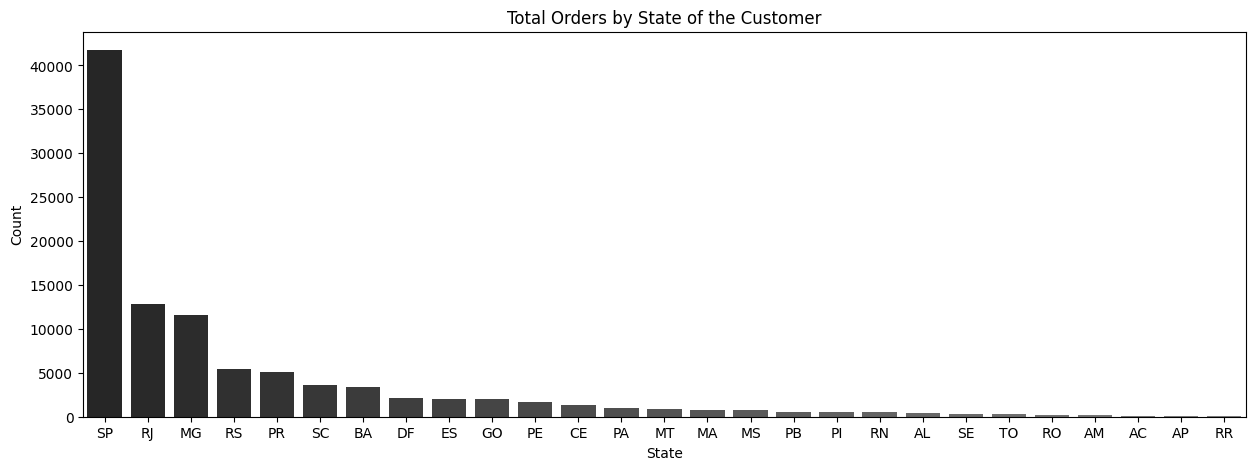

In [37]:
totalOrdersByState = df.groupby('customer_state')['order_id'].nunique().sort_values(ascending=False)
totalOrdersByState

plt.figure(figsize=(15,5))
plt.title('Total Orders by State of the Customer')
sns.barplot(x=totalOrdersByState.index, y=totalOrdersByState,palette='dark:gray')
plt.ylabel('Count')
plt.xlabel('State')

C:\Users\trime\AppData\Local\Temp\ipykernel_27476\537540582.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freightAvgState.index, y=freightAvgState,palette='dark:blue')


Text(0.5, 0, 'State')

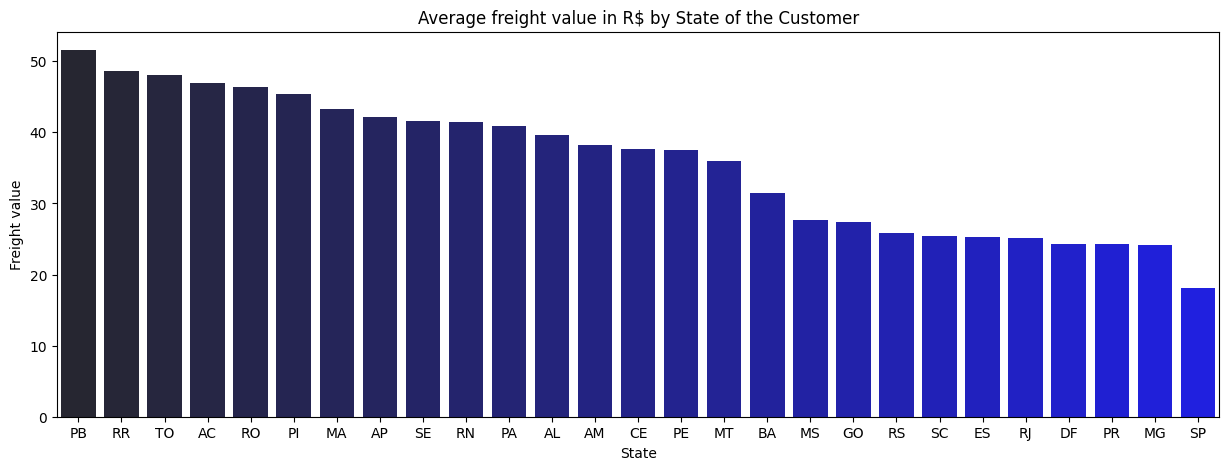

In [38]:
freightAvgState = (df.groupby('customer_state')['freight_value'].sum() /df.groupby('customer_state')['order_id'].nunique()).sort_values(ascending=False)

plt.figure(figsize=(15,5))
plt.title('Average freight value in R$ by State of the Customer')
sns.barplot(x=freightAvgState.index, y=freightAvgState,palette='dark:blue')
plt.ylabel('Freight value')
plt.xlabel('State')

## DELIIVERY

In [42]:
olist_orders['delivery_time'] = (olist_orders['order_delivered_customer_date'] - olist_orders['order_approved_at']).dt.total_seconds() / 86400
olist_orders['estimated_delivery_time'] = (olist_orders['order_estimated_delivery_date'] - olist_orders['order_approved_at']).dt.total_seconds() / 86400

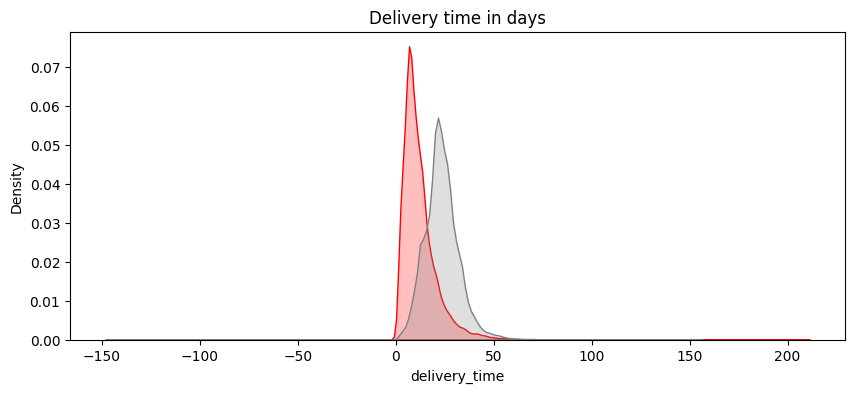

In [51]:
# Delivery estimated time and actual delivery time
plt.figure(figsize=(10,4))
plt.title("Delivery time in days")
ax1 = sns.kdeplot(olist_orders['delivery_time'].dropna(), color="red", label='Delivery time', fill=True)
ax2 = sns.kdeplot(olist_orders['estimated_delivery_time'].dropna(), color="grey", label='Estimated delivery time',fill=True)

# RFM Olist

## RFM analysis

In [ ]:
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
datasets = [olist_customer, olist_geolocation, olist_order_items, olist_order_payments, olist_order_reviews, olist_orders, olist_products, olist_sellers, olist_categories]
titles = ["customers", "geolocation", "items", "payments", "reviews", "orders", "products", "sellers", "category_translation"]

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col in data.columns ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [data.duplicated().sum() for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='YlGnBu')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",98410,7,0,144633,"review_comment_title, review_comment_message"
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, year, month, date",99441,11,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,products,"product_id, product_category_name, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,610,product_category_name
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,category_translation,"product_category_name, product_category_name_english",71,2,0,0,


In [ ]:
for i in datasets:
    i.dropna(inplace=True)


In [ ]:
for i in datasets:
    i.drop(i[i.duplicated()].index, axis=0, inplace=True)

In [ ]:
datasets = [olist_customer, olist_geolocation, olist_order_items, olist_order_payments, olist_order_reviews, olist_orders, olist_products, olist_sellers, olist_categories]
titles = ["customers", "geolocation", "items", "payments", "reviews", "orders", "products", "sellers", "category_translation"]

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='YlGnBu')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",738332,5,0,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",9798,7,0,0,
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, year, month, date",96461,11,0,0,
6,products,"product_id, product_category_name, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32341,9,0,0,
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,category_translation,"product_category_name, product_category_name_english",71,2,0,0,


In [ ]:
merged_df= pd.merge(olist_customer, olist_orders, on="customer_id")
merged_df= merged_df.merge(olist_order_reviews, on="order_id")
merged_df= merged_df.merge(olist_order_items, on="order_id")
merged_df= merged_df.merge(olist_products, on="product_id")
merged_df= merged_df.merge(olist_order_payments, on="order_id")
merged_df= merged_df.merge(olist_sellers, on='seller_id')
merged_df= merged_df.merge(olist_categories, on='product_category_name')
merged_df.shape

(11546, 43)

In [ ]:
merged_df.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
year                             0
month                            0
date                             0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_length 

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11546 entries, 0 to 11545
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    11546 non-null  object        
 1   customer_unique_id             11546 non-null  object        
 2   customer_zip_code_prefix       11546 non-null  int64         
 3   customer_city                  11546 non-null  object        
 4   customer_state                 11546 non-null  object        
 5   order_id                       11546 non-null  object        
 6   order_status                   11546 non-null  object        
 7   order_purchase_timestamp       11546 non-null  datetime64[ns]
 8   order_approved_at              11546 non-null  datetime64[ns]
 9   order_delivered_carrier_date   11546 non-null  datetime64[ns]
 10  order_delivered_customer_date  11546 non-null  datetime64[ns]
 11  order_estimated

In [ ]:
time_columns= ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
               'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date']

In [ ]:
sp_data=merged_df[merged_df.customer_state=='SP']

In [ ]:
merged_df[time_columns]=merged_df[time_columns].apply(pd.to_datetime)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11546 entries, 0 to 11545
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    11546 non-null  object        
 1   customer_unique_id             11546 non-null  object        
 2   customer_zip_code_prefix       11546 non-null  int64         
 3   customer_city                  11546 non-null  object        
 4   customer_state                 11546 non-null  object        
 5   order_id                       11546 non-null  object        
 6   order_status                   11546 non-null  object        
 7   order_purchase_timestamp       11546 non-null  datetime64[ns]
 8   order_approved_at              11546 non-null  datetime64[ns]
 9   order_delivered_carrier_date   11546 non-null  datetime64[ns]
 10  order_delivered_customer_date  11546 non-null  datetime64[ns]
 11  order_estimated

In [ ]:
present_day = merged_df['order_purchase_timestamp'].max()+ dt.timedelta(days=2)

print("Present day: ",present_day)

Present day:  2018-08-31 14:18:28


In [ ]:
print("Latest date in dataset: ", merged_df['order_purchase_timestamp'].max())

Latest date in dataset:  2018-08-29 14:18:28


In [ ]:
recency_df= pd.DataFrame(merged_df.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max())
recency_df

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,000ec5bff359e1c0ad76a81a45cb598f,2018-08-21 11:34:26
2,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49
3,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00
4,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32
...,...,...
9319,ffeb904468642a1ce663a322629801cb,2018-06-27 11:57:41
9320,ffecceca389973ef16660d58696f281e,2018-04-25 12:08:11
9321,fff2ae16b99c6f3c785f0e052f2a9cfb,2018-04-20 11:03:47
9322,fff3e1d7bc75f11dc7670619b2e61840,2018-07-20 13:47:30


In [ ]:
rfm= merged_df.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda date: (present_day - date.max()).days,
                                        'order_id': lambda num: len(num), 
                                        'payment_value': lambda price: price.sum()})

In [ ]:
rfm.columns=['Recency','Frequency','Monetary']
rfm['Recency'] = rfm['Recency'].astype(int)
rfm['Monetary'] = rfm['Monetary'].astype(int)
rfm

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141
000ec5bff359e1c0ad76a81a45cb598f,10,1,27
00172711b30d52eea8b313a7f2cced02,34,1,122
001928b561575b2821c92254a2327d06,6,2,329
0019e8c501c85848ac0966d45226fa1d,122,1,197
...,...,...,...
ffeb904468642a1ce663a322629801cb,65,1,93
ffecceca389973ef16660d58696f281e,128,1,72
fff2ae16b99c6f3c785f0e052f2a9cfb,133,1,200


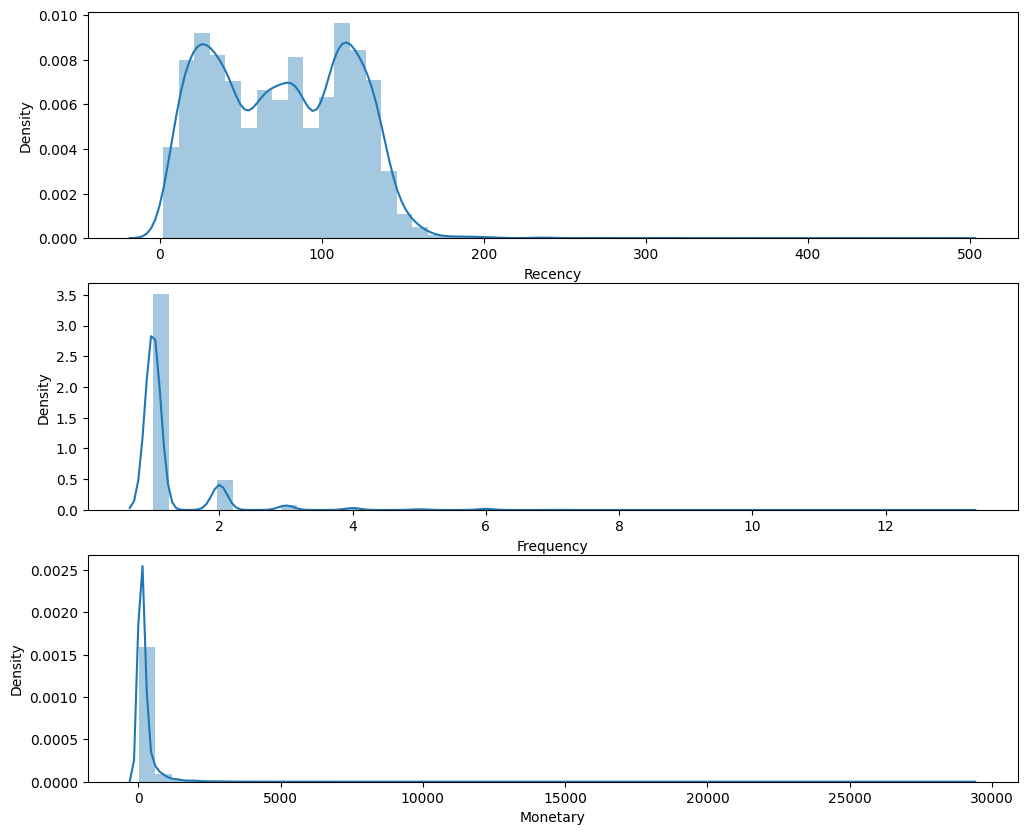

In [ ]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(rfm['Recency'])
plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(rfm['Monetary'])
plt.show()

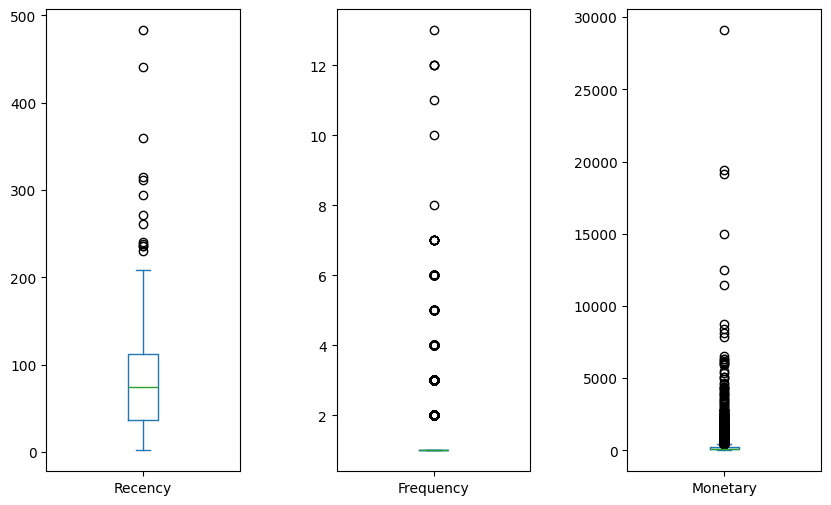

In [ ]:
rfm.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()

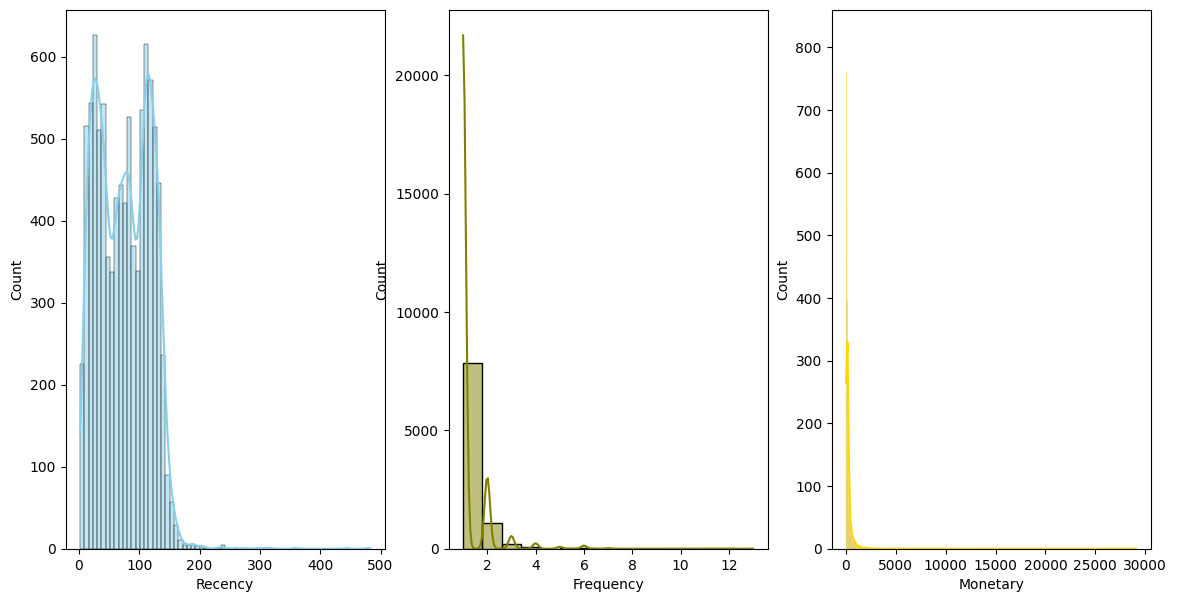

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(14, 7))

sns.histplot(data=rfm, x="Recency", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=rfm, x="Frequency", kde=True, color="olive", ax=axs[1])
sns.histplot(data=rfm, x="Monetary", kde=True, color="gold", ax=axs[2])

plt.show()

In [ ]:
# Calculate Z scores to normalize the data
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

                                   Recency  Frequency  Monetary
customer_unique_id                                             
0000366f3b9a7992bf8c76cfdf3221e2  0.895684   0.331572  0.161318
000ec5bff359e1c0ad76a81a45cb598f  1.525878   0.331572  0.339174
00172711b30d52eea8b313a7f2cced02  0.961630   0.331572  0.190961
001928b561575b2821c92254a2327d06  1.619919   1.059778  0.131988
0019e8c501c85848ac0966d45226fa1d  1.107276   0.331572  0.073950
...                                    ...        ...       ...
ffeb904468642a1ce663a322629801cb  0.232811   0.331572  0.236205
ffecceca389973ef16660d58696f281e  1.248338   0.331572  0.268968
fff2ae16b99c6f3c785f0e052f2a9cfb  1.365890   0.331572  0.069270
fff3e1d7bc75f11dc7670619b2e61840  0.773548   0.331572  0.253366
ffff5962728ec6157033ef9805bacc48  1.060256   0.331572  0.173799

[9324 rows x 3 columns]


In [ ]:
rfm_clean = rfm[(z < 3).all(axis=1)]

In [ ]:
rfm.shape

(9324, 3)

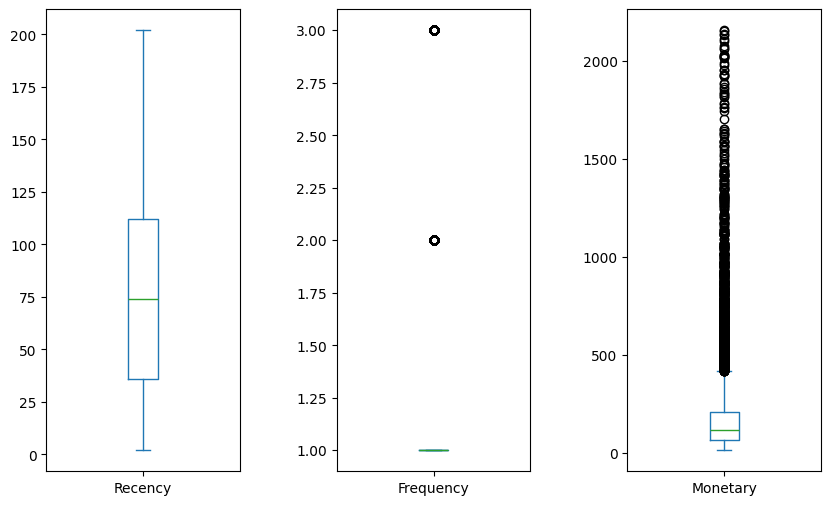

In [ ]:
# Create box plots to check for outliers
rfm_clean.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()

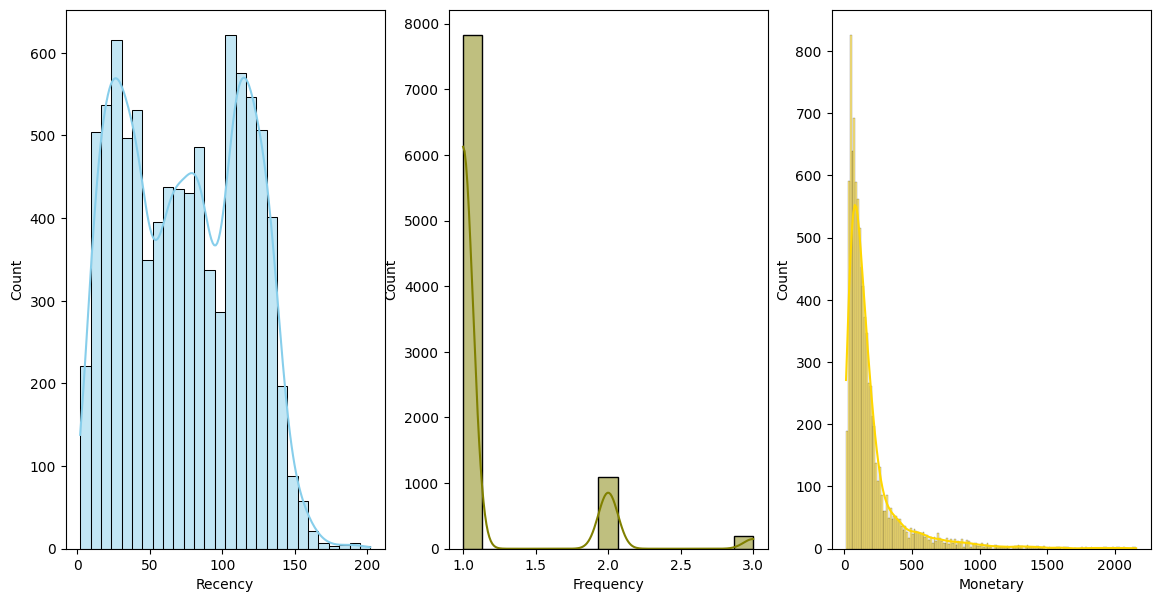

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(14, 7))

sns.histplot(data=rfm_clean, x="Recency", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=rfm_clean, x="Frequency", kde=True, color="olive", ax=axs[1])
sns.histplot(data=rfm_clean, x="Monetary", kde=True, color="gold", ax=axs[2])

plt.show()

## RFM Scorce

In [ ]:
quintiles = rfm_clean[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 30.0, 0.4: 59.0, 0.6: 88.0, 0.8: 117.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 58.0, 0.4: 96.0, 0.6: 147.0, 0.8: 244.0}}

In [ ]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5

In [ ]:
# Calculate RFM score for each customer

rfm_clean['R'] = rfm_clean['Recency'].apply(lambda x: r_score(x))
rfm_clean['F'] = rfm_clean['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm_clean['M'] = rfm_clean['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [ ]:
# Combine the scores
rfm_clean['RFM Score'] = rfm_clean['R'].map(str) + rfm_clean['F'].map(str) + rfm_clean['M'].map(str)
rfm_clean.head()

,Recency,Frequency,Monetary,R,F,M,RFM Score
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141,2,1,3,213
000ec5bff359e1c0ad76a81a45cb598f,10,1,27,5,1,1,511
00172711b30d52eea8b313a7f2cced02,34,1,122,4,1,3,413
001928b561575b2821c92254a2327d06,6,2,329,5,5,5,555
0019e8c501c85848ac0966d45226fa1d,122,1,197,1,1,4,114


In [ ]:
# Created 6 segments based on R and F scores

segments = {
    '[1-2][1-4]': 'at risk',
    '[1-2]5': 'can\'t loose',
    '3[1-3]': 'needs attention',
    '[3-4][4-5]': 'loyal customers',
    '[4-5]1': 'new customers',
    '[4-5][2-5]': 'champions'
    
}

rfm_clean['Segment'] = rfm_clean['R'].map(str) + rfm_clean['F'].map(str)
rfm_clean['Segment'] = rfm_clean['Segment'].replace(segments, regex=True)
rfm_clean.head()

,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141,2,1,3,213,at risk
000ec5bff359e1c0ad76a81a45cb598f,10,1,27,5,1,1,511,new customers
00172711b30d52eea8b313a7f2cced02,34,1,122,4,1,3,413,new customers
001928b561575b2821c92254a2327d06,6,2,329,5,5,5,555,champions
0019e8c501c85848ac0966d45226fa1d,122,1,197,1,1,4,114,at risk


In [ ]:
# count the number of customers in each segment
segments_counts = rfm_clean['Segment'].value_counts().sort_values(ascending=True)

segments_counts

Segment
champions           251
can't loose         508
loyal customers     521
needs attention    1543
at risk            3102
new customers      3175
Name: count, dtype: int64

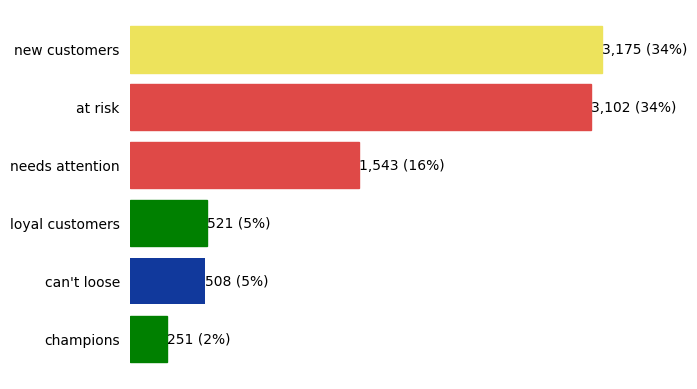

In [ ]:
# Distribution of Segments
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='#11399c')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('green')
        if segments_counts.index[i] in ['at risk', 'needs attention']:
            bar.set_color('#df4947')
        if segments_counts.index[i] in ['new customers']:
            bar.set_color('#ede35c')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()